In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings("ignore")
print("modules loaded")

ModuleNotFoundError: No module named 'pandas'

In [8]:
sales=pd.read_csv('C:\Users\lftra\Downloads\archive\supermarket_sales - Sheet1.csv')
sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:

sales_subset = sales[["City", "Total", "Rating"]]
print(sales_subset.head())


        City     Total  Rating
0     Yangon  548.9715     9.1
1  Naypyitaw   80.2200     9.6
2     Yangon  340.5255     7.4
3     Yangon  489.0480     8.4
4     Yangon  634.3785     5.3


In [11]:


mean_rating = sales_subset["Rating"].mean()
print(f"Media do Ranking : {mean_rating}")


Mean rating: 6.9727


In [12]:
good_companies = sales_subset[sales_subset["Rating"] >= 6.9]
bad_companies = sales_subset[sales_subset["Rating"] < 6.9]

print("Boas:")
print(good_companies.head())

print("Ruins:")
print(bad_companies.head())

Good companies:
        City     Total  Rating
0     Yangon  548.9715     9.1
1  Naypyitaw   80.2200     9.6
2     Yangon  340.5255     7.4
3     Yangon  489.0480     8.4
7  Naypyitaw  772.3800     8.0
Bad companies:
         City     Total  Rating
4      Yangon  634.3785     5.3
5   Naypyitaw  627.6165     4.1
6      Yangon  433.6920     5.8
9    Mandalay  172.7460     5.9
10   Mandalay   60.8160     4.5


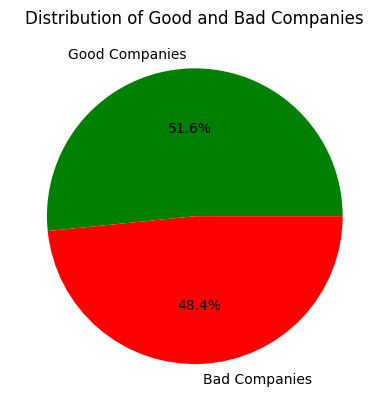

In [19]:
good_count = len(good_companies)
bad_count = len(bad_companies)

labels = ["Boas ", "Ruins"]
colors = ["green", "red"]

plt.pie([good_count, bad_count], labels=labels, autopct="%1.1f%%", colors=colors)
plt.title("Distribuição de boas e más empresas")
plt.show()
